# Imports

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, MinMaxScaler
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn import metrics
matplotlib.rcParams['figure.figsize'] = (10, 4)

In [93]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


# Exploratory Data Analysis

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [95]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [96]:
df.hist()

array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

In [ ]:
df.isna().sum() / len(df) * 100

director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
imdb_score                    0.000000
aspect_ratio             

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df[df["num_critic_for_reviews"]]
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


# Preprocess Data

In [ ]:
y = df["num_critic_for_reviews"]
X = df[df.columns.difference(["num_critic_for_reviews"])]
X

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,content_rating,...,gross,imdb_score,language,movie_facebook_likes,movie_imdb_link,movie_title,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,1000.0,CCH Pounder,936.0,Joel David Moore,855.0,Wes Studi,1.78,237000000.0,4834,PG-13,...,760505847.0,7.9,English,33000,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Avatar,3054.0,886204,avatar|future|marine|native|paraplegic,2009.0
1,40000.0,Johnny Depp,5000.0,Orlando Bloom,1000.0,Jack Davenport,2.35,300000000.0,48350,PG-13,...,309404152.0,7.1,English,0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's End,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,2007.0
2,11000.0,Christoph Waltz,393.0,Rory Kinnear,161.0,Stephanie Sigman,2.35,245000000.0,11700,PG-13,...,200074175.0,6.8,English,85000,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Spectre,994.0,275868,bomb|espionage|sequel|spy|terrorist,2015.0
3,27000.0,Tom Hardy,23000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,2.35,250000000.0,106759,PG-13,...,448130642.0,8.5,English,164000,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,The Dark Knight Rises,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,2012.0
5,640.0,Daryl Sabara,632.0,Samantha Morton,530.0,Polly Walker,2.35,263700000.0,1873,PG-13,...,73058679.0,6.6,English,24000,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,John Carter,738.0,212204,alien|american civil war|male nipple|mars|prin...,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,576.0,Maggie Cheung,133.0,Béatrice Dalle,45.0,Don McKellar,2.35,4500.0,776,R,...,136007.0,6.9,French,171,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,Clean,39.0,3924,jail|junkie|money|motel|singer,2004.0
5027,5.0,Fereshteh Sadre Orafaiy,0.0,Nargess Mamizadeh,0.0,Mojgan Faramarzi,1.85,10000.0,5,Not Rated,...,673780.0,7.5,Persian,697,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,The Circle,26.0,4555,abortion|bus|hospital|prison|prostitution,2000.0
5033,291.0,Shane Carruth,45.0,David Sullivan,8.0,Casey Gooden,1.85,7000.0,368,PG-13,...,424760.0,7.0,English,19000,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,Primer,371.0,72639,changing the future|independent film|invention...,2004.0
5035,121.0,Carlos Gallardo,20.0,Peter Marquardt,6.0,Consuelo Gómez,1.37,7000.0,147,R,...,2040920.0,6.9,Spanish,0,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,El Mariachi,130.0,52055,assassin|death|guitar|gun|mariachi,1992.0


In [ ]:
X.isna().sum()

actor_1_facebook_likes       0
actor_1_name                 0
actor_2_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
actor_3_name                 0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
content_rating               0
country                      0
director_facebook_likes      0
director_name                0
duration                     0
facenumber_in_poster         0
genres                       0
gross                        0
imdb_score                   0
language                     0
movie_facebook_likes         0
movie_imdb_link              0
movie_title                  0
num_user_for_reviews         0
num_voted_users              0
plot_keywords                0
title_year                   0
dtype: int64

### Drop features

#### Dropping unnecessary columns such as imdb link, names

In [ ]:
X = X.drop([
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "director_name",
           "movie_imdb_link",
           "movie_title"
], axis=1)
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
imdb_score                   float64
language                      object
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

Lets take a look at some interesting features

#### Language

In [ ]:
value_counts = X["language"].value_counts()
value_counts

English       3599
French          34
Spanish         23
Mandarin        15
Japanese        10
German          10
Italian          7
Cantonese        7
Korean           5
Portuguese       5
Hindi            5
Norwegian        4
Persian          3
Danish           3
Dutch            3
Thai             3
Aboriginal       2
Indonesian       2
Dari             2
Vietnamese       1
Mongolian        1
Czech            1
Russian          1
Kazakh           1
Hebrew           1
Bosnian          1
Zulu             1
Aramaic          1
Maya             1
Arabic           1
Filipino         1
None             1
Hungarian        1
Romanian         1
Name: language, dtype: int64

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(x="language", data=X)

<Figure size 2880x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

View columns in percentage

In [ ]:
X['language'].value_counts(normalize=True) * 100

English       95.794517
French         0.904977
Spanish        0.612191
Mandarin       0.399255
Japanese       0.266170
German         0.266170
Italian        0.186319
Cantonese      0.186319
Korean         0.133085
Portuguese     0.133085
Hindi          0.133085
Norwegian      0.106468
Persian        0.079851
Danish         0.079851
Dutch          0.079851
Thai           0.079851
Aboriginal     0.053234
Indonesian     0.053234
Dari           0.053234
Vietnamese     0.026617
Mongolian      0.026617
Czech          0.026617
Russian        0.026617
Kazakh         0.026617
Hebrew         0.026617
Bosnian        0.026617
Zulu           0.026617
Aramaic        0.026617
Maya           0.026617
Arabic         0.026617
Filipino       0.026617
None           0.026617
Hungarian      0.026617
Romanian       0.026617
Name: language, dtype: float64

English accounts for 93.5%, this data is unusable since it's heavily skewed. Dropping this data is the best option

In [ ]:
X = X.drop("language", axis=1)
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
imdb_score                   float64
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Country

In [ ]:
value_counts = X["country"].value_counts()
value_counts

USA               2987
UK                 318
France             101
Germany             80
Canada              59
Australia           39
Spain               21
Japan               15
China               14
Hong Kong           13
Italy               11
New Zealand         11
Denmark              8
South Korea          8
Ireland              7
Mexico               6
India                5
Brazil               5
Norway               4
Iran                 4
Thailand             4
South Africa         3
Russia               3
Argentina            3
Czech Republic       3
Netherlands          3
Romania              2
Hungary              2
Taiwan               2
Indonesia            1
Finland              1
Colombia             1
Iceland              1
Israel               1
Belgium              1
Afghanistan          1
West Germany         1
Greece               1
Official site        1
Poland               1
Chile                1
Georgia              1
Aruba                1
New Line   

In [ ]:
value_counts = X["country"].value_counts() / X.shape[0] * 100
value_counts

USA               79.504924
UK                 8.464200
France             2.688315
Germany            2.129359
Canada             1.570402
Australia          1.038062
Spain              0.558957
Japan              0.399255
China              0.372638
Hong Kong          0.346021
Italy              0.292787
New Zealand        0.292787
Denmark            0.212936
South Korea        0.212936
Ireland            0.186319
Mexico             0.159702
India              0.133085
Brazil             0.133085
Norway             0.106468
Iran               0.106468
Thailand           0.106468
South Africa       0.079851
Russia             0.079851
Argentina          0.079851
Czech Republic     0.079851
Netherlands        0.079851
Romania            0.053234
Hungary            0.053234
Taiwan             0.053234
Indonesia          0.026617
Finland            0.026617
Colombia           0.026617
Iceland            0.026617
Israel             0.026617
Belgium            0.026617
Afghanistan        0

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(x="country", data=X)

<Figure size 2880x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

The 3 dominant countries are USA, UK, and France. Other countries should be recognized as "other" as it's less relevant than the 3

In [ ]:
def process_country(X):
  top_three = ["USA","UK","France"]
  X["country"] = X["country"].where(X["country"].isin(top_three), "others")
  return X
X = process_country(X)
X

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,content_rating,country,director_facebook_likes,duration,facenumber_in_poster,genres,gross,imdb_score,movie_facebook_likes,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,PG-13,USA,0.0,178.0,0.0,Action|Adventure|Fantasy|Sci-Fi,760505847.0,7.9,33000,3054.0,886204,avatar|future|marine|native|paraplegic,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,PG-13,USA,563.0,169.0,0.0,Action|Adventure|Fantasy,309404152.0,7.1,0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,PG-13,UK,0.0,148.0,1.0,Action|Adventure|Thriller,200074175.0,6.8,85000,994.0,275868,bomb|espionage|sequel|spy|terrorist,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,PG-13,USA,22000.0,164.0,0.0,Action|Thriller,448130642.0,8.5,164000,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,2012.0
5,640.0,632.0,530.0,2.35,263700000.0,1873,PG-13,USA,475.0,132.0,1.0,Action|Adventure|Sci-Fi,73058679.0,6.6,24000,738.0,212204,alien|american civil war|male nipple|mars|prin...,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,576.0,133.0,45.0,2.35,4500.0,776,R,France,107.0,110.0,1.0,Drama|Music|Romance,136007.0,6.9,171,39.0,3924,jail|junkie|money|motel|singer,2004.0
5027,5.0,0.0,0.0,1.85,10000.0,5,Not Rated,others,397.0,90.0,0.0,Drama,673780.0,7.5,697,26.0,4555,abortion|bus|hospital|prison|prostitution,2000.0
5033,291.0,45.0,8.0,1.85,7000.0,368,PG-13,USA,291.0,77.0,0.0,Drama|Sci-Fi|Thriller,424760.0,7.0,19000,371.0,72639,changing the future|independent film|invention...,2004.0
5035,121.0,20.0,6.0,1.37,7000.0,147,R,USA,0.0,81.0,0.0,Action|Crime|Drama|Romance|Thriller,2040920.0,6.9,0,130.0,52055,assassin|death|guitar|gun|mariachi,1992.0


#### Genres

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(x=X.genres) 

<Figure size 2880x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

Genres are too complicated and interconnected, dropping this data as for right now

In [ ]:
X = X.drop("genres", axis=1)
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Content Rating

In [ ]:
value_counts = X["content_rating"].value_counts() / X.shape[0] * 100
value_counts

R            45.248869
PG-13        34.841629
PG           15.065212
G             2.315677
Not Rated     0.904977
Unrated       0.585574
Approved      0.452489
X             0.266170
NC-17         0.159702
Passed        0.079851
M             0.053234
GP            0.026617
Name: content_rating, dtype: float64

<AxesSubplot:xlabel='content_rating', ylabel='count'>

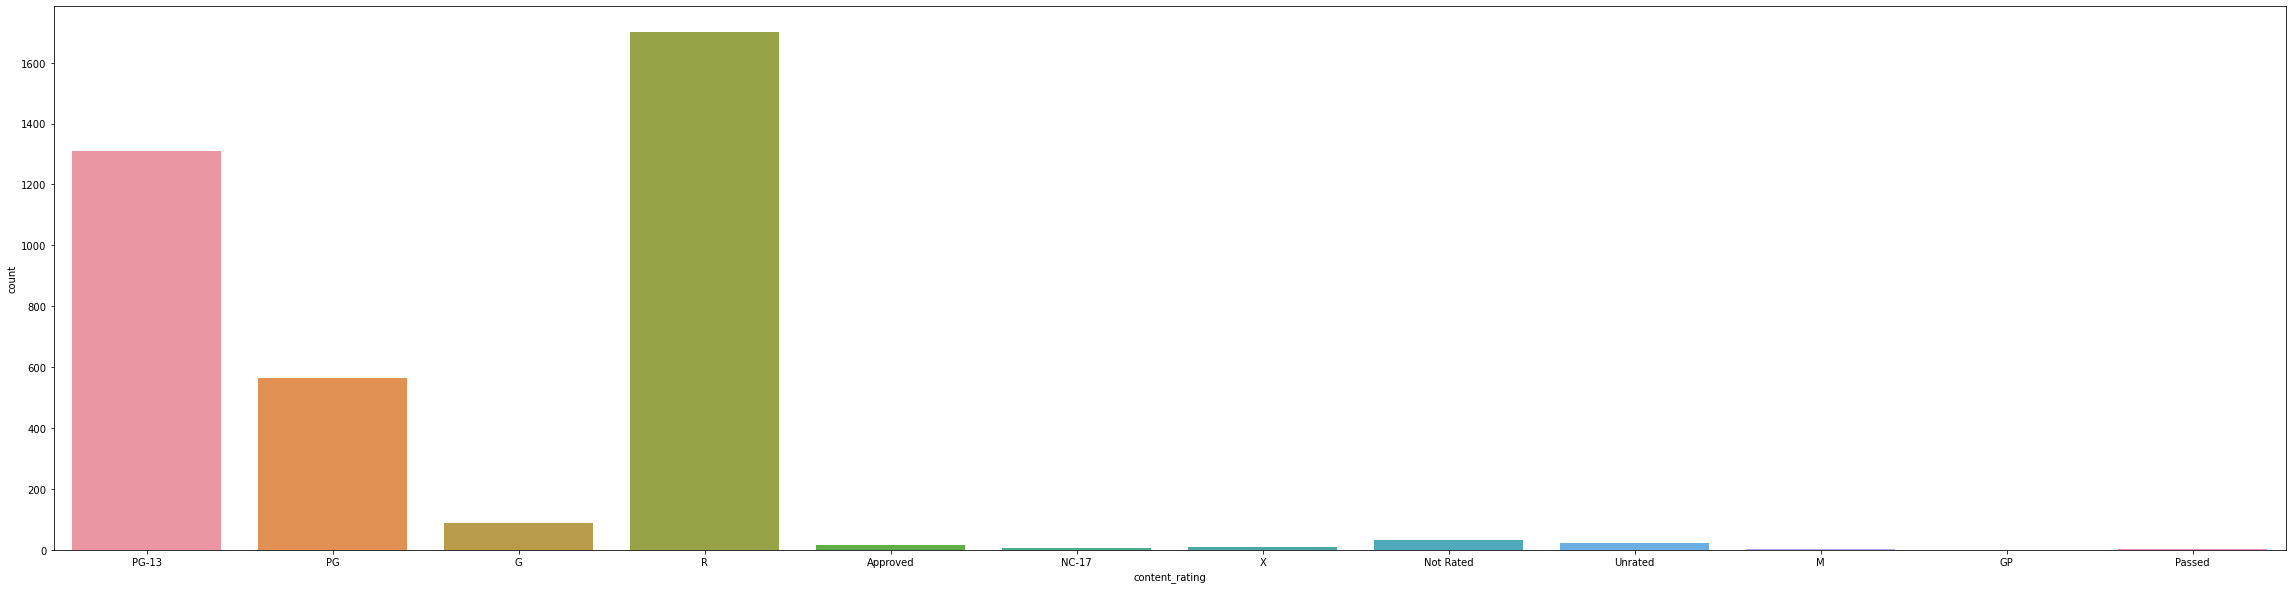

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(x="content_rating", data=X)

R, PG, PG-13 are the 3 most dominant values in rating. Group the rest as "others"

In [ ]:
def process_content_rating(X):
  top_three = ["R","PG"]
  X["content_rating"] = X["content_rating"].where(X["content_rating"].isin(top_three), "others")
  return X
X = process_content_rating(X)
X["content_rating"]

0       others
1       others
2       others
3       others
5       others
         ...  
5026         R
5027    others
5033    others
5035         R
5042        PG
Name: content_rating, Length: 3757, dtype: object

In [ ]:
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Plot keywords

In [ ]:
value_counts = X["plot_keywords"].value_counts()
value_counts

1940s|child hero|fantasy world|orphan|reference to peter pan           3
halloween|masked killer|michael myers|slasher|trick or treat           3
eighteen wheeler|illegal street racing|truck|trucker|undercover cop    3
assistant|experiment|frankenstein|medical student|scientist            3
animal name in title|ape abducts a woman|gorilla|island|king kong      3
                                                                      ..
fight|gang|junkyard|military|soldier                                   1
blanket|competition|family relationships|feather|sleepover             1
clitoris|deep throat|fellatio|oral sex|porn industry                   1
arizona|death|gang|police|sheriff                                      1
high school|hospital|new jersey|stanford university|swimming           1
Name: plot_keywords, Length: 3657, dtype: int64

In [ ]:
#sns.countplot(x="plot_keywords", data=X)

Same as genres, data is too complex and interconnected. Dropping this value

In [ ]:
X = X.drop("plot_keywords", axis=1)
X.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes           int64
num_user_for_reviews         float64
num_voted_users                int64
title_year                   float64
dtype: object

### Correlation

<AxesSubplot:>

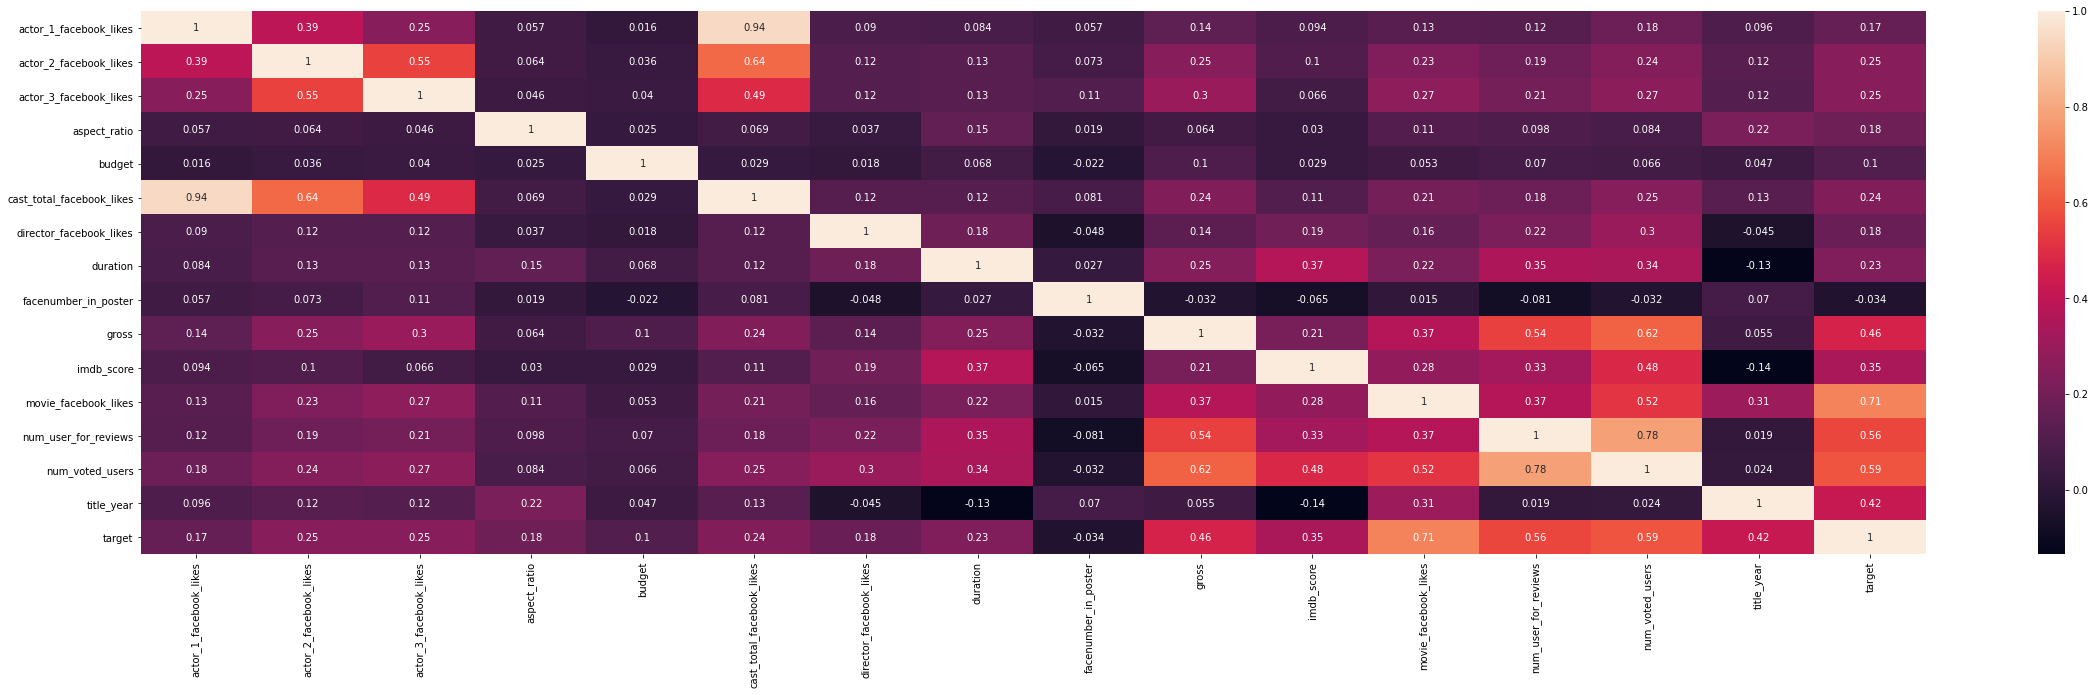

In [ ]:
plt.figure(figsize=(40,10))
heatmap = X.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

From the heatmap, a number of insights that were gained were
- Cast total facebook likes and number of likes of actor 1 are highly correlated (0.94)
- Number of likes of actor 2 and 3 are somewhat correlated (0.5)
- Total facebook likes of actor are the representative of number of likes of actor 1,2,3

Drop actor 1,2,3 and keep the total actor facebook likes

In [ ]:
X.drop("actor_1_facebook_likes", axis=1, inplace=True)
X.drop("actor_2_facebook_likes", axis=1, inplace=True)
X.drop("actor_3_facebook_likes", axis=1, inplace=True)

<AxesSubplot:>

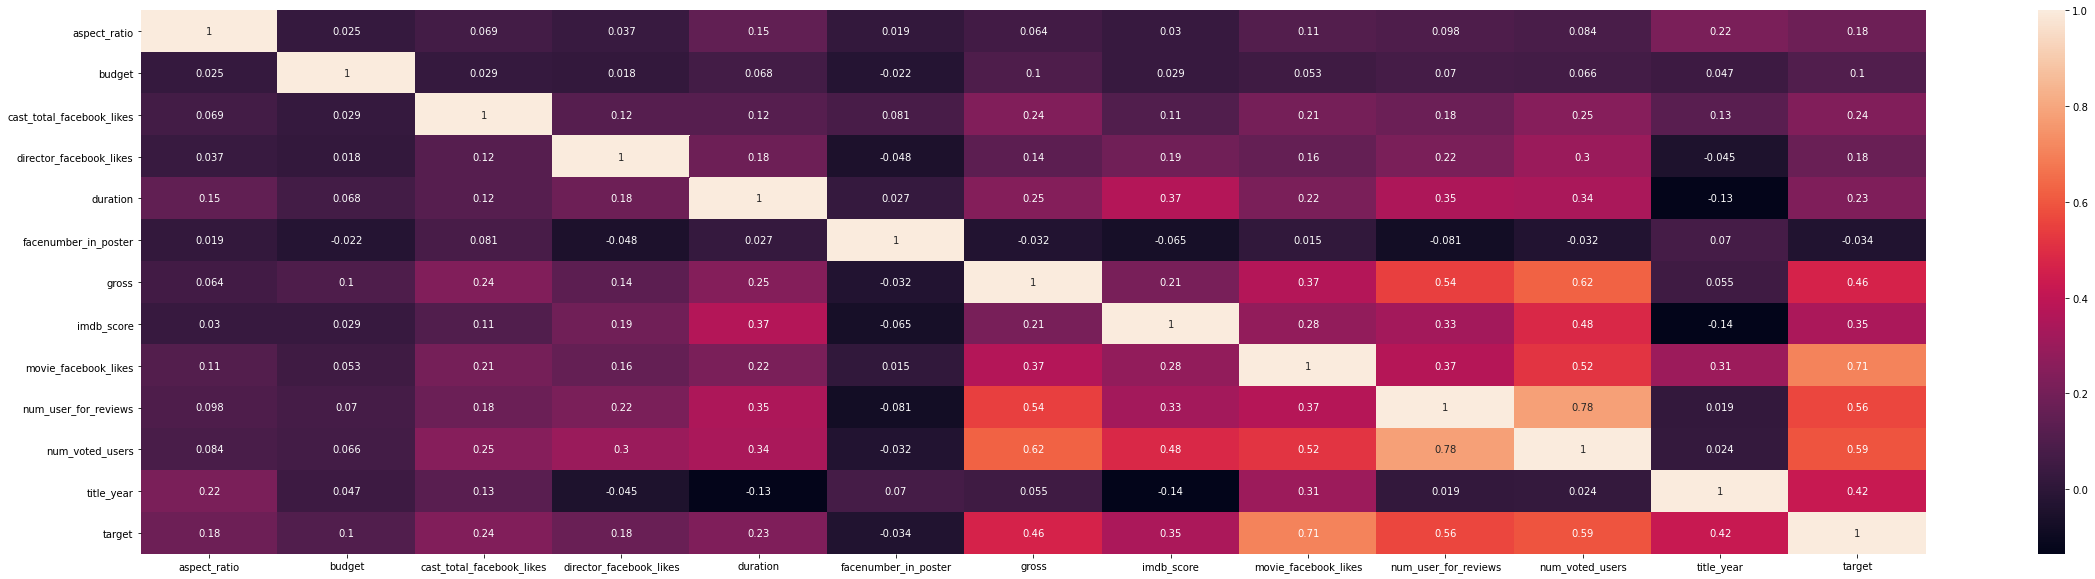

In [ ]:
plt.figure(figsize=(40,10))
heatmap = X.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

### Encoding

#### Integer to Float

In [ ]:
def int_to_float(X):
    X_copy = X.copy()
    int_cols = X_copy.select_dtypes(include=["int"]).columns
    X_copy[int_cols] = X_copy[int_cols].apply(lambda x: x.astype("float"))
    return X_copy
X = int_to_float(X)
X.dtypes


aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes         float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

#### String to One-hot

In [ ]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X = one_hot_encode(X)
X.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
imdb_score                   float64
movie_facebook_likes         float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
content_rating_PG              uint8
content_rating_R               uint8
content_rating_others          uint8
country_France                 uint8
country_UK                     uint8
country_USA                    uint8
country_others                 uint8
dtype: object

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(np.array(X.values, dtype=float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     Features   VIF
18             country_others   inf
17                country_USA   inf
16                 country_UK   inf
15             country_France   inf
14      content_rating_others   inf
13           content_rating_R   inf
12          content_rating_PG   inf
10            num_voted_users  4.12
9        num_user_for_reviews  2.77
6                       gross  2.04
8        movie_facebook_likes  1.60
7                  imdb_score  1.56
4                    duration  1.34
11                 title_year  1.30
3     director_facebook_likes  1.13
2   cast_total_facebook_likes  1.12
0                aspect_ratio  1.09
5        facenumber_in_poster  1.04
1                      budget  1.03


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<AxesSubplot:>

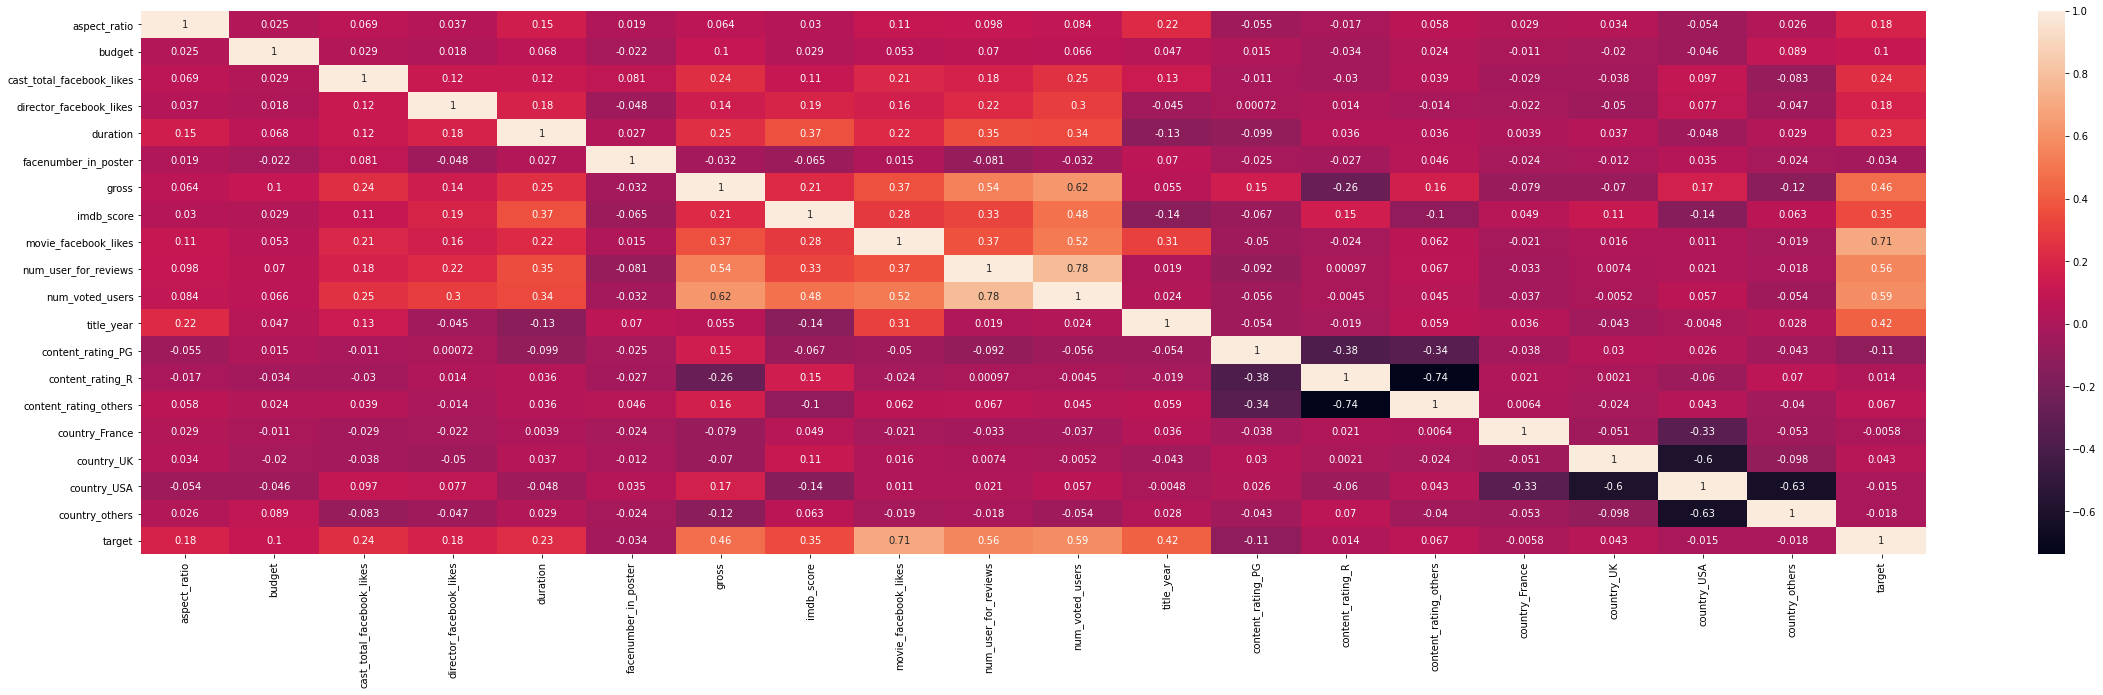

In [ ]:
plt.figure(figsize=(40,10))
heatmap = X.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

#### Split train test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_user_for_reviews,num_voted_users,title_year,content_rating_PG,content_rating_R,content_rating_others,country_France,country_UK,country_USA,country_others
107,1.85,1.600000e+08,4705.0,50.0,93.0,2.0,320706665.0,6.1,0.0,326.0,211971.0,2007.0,1,0,0,0,0,1,0
1944,2.35,2.300000e+07,21195.0,452.0,106.0,3.0,15785632.0,7.5,15000.0,119.0,32507.0,2016.0,0,0,1,0,1,0,0
4814,2.35,6.000000e+06,1233.0,33.0,89.0,0.0,12843.0,6.1,0.0,131.0,27297.0,2012.0,0,0,1,1,0,0,0
1872,2.35,2.600000e+07,3197.0,97.0,118.0,0.0,26761283.0,6.7,19000.0,99.0,43084.0,2014.0,0,0,1,0,0,1,0
1613,1.85,3.000000e+07,1556.0,729.0,125.0,1.0,65010106.0,7.2,0.0,612.0,107557.0,2002.0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,2.35,3.500000e+07,23923.0,64.0,109.0,0.0,124732962.0,6.8,0.0,631.0,286178.0,2006.0,0,0,1,0,0,1,0
1925,1.85,2.500000e+07,12624.0,335.0,114.0,3.0,41597830.0,7.6,0.0,660.0,102123.0,2002.0,0,0,1,0,0,1,0
2631,2.35,1.700000e+07,3423.0,13.0,94.0,1.0,42672630.0,5.3,0.0,172.0,27580.0,2003.0,1,0,0,0,0,1,0
2334,1.85,2.127520e+09,991.0,78.0,103.0,1.0,410388.0,6.9,973.0,79.0,13727.0,2004.0,0,0,1,0,0,0,1


### Normalization

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

X_train_norm

array([[0.04520918, 0.06399992, 0.00716428, ..., 0.        , 1.        ,
        0.        ],
       [0.07894737, 0.00919991, 0.03227354, ..., 1.        , 0.        ,
        0.        ],
       [0.07894737, 0.00239991, 0.00187748, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07894737, 0.00679991, 0.00521219, ..., 0.        , 1.        ,
        0.        ],
       [0.04520918, 0.85100795, 0.00150899, ..., 0.        , 0.        ,
        1.        ],
       [0.07894737, 0.01199991, 0.05692903, ..., 0.        , 1.        ,
        0.        ]])

# Model

In [ ]:
lr = LinearRegression()
lr.fit(X_train_norm, y_train)

LinearRegression()

In [ ]:
y_train_pred=pd.DataFrame(lr.predict(X_train_norm))
y_test_pred=pd.DataFrame(lr.predict(X_test_norm))

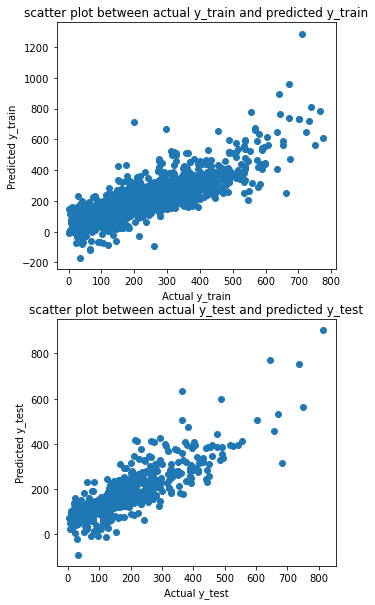

In [ ]:
fig,(ax1, ax2)=plt.subplots(2,1,figsize=(5,10))
ax1.scatter(y_train,y_train_pred)
ax1.set_xlabel('Actual y_train')
ax1.set_ylabel('Predicted y_train')
ax1.set_title('scatter plot between actual y_train and predicted y_train')
ax2.scatter(y_test,y_test_pred)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
plt.show()

In [ ]:
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('r2 :',metrics.r2_score(y_test, y_test_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(X_test)-1)/(len(X_test)-13-1))

mae : 49.176778590425535
mse : 4183.318011344747
mape : 0.64551408120474
r2 : 0.716331296022339
Adjusted r2 : 0.7113344218330306


# Hyperparameter Tuning

In [ ]:
a=['constant', 'optimal', 'invscaling']
c = [0.00001,0.0001,0.001,0.01,0.1] 
param_grid = dict(learning_rate=a,eta0=c)
clf=SGDRegressor(max_iter=50000, tol=1e-3)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error') 
grid_result = grid.fit(X_train_norm, y_train) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before 

Best Score:  -0.6262485181313118
Best Params:  {'eta0': 0.1, 'learning_rate': 'constant'}


In [ ]:
y_test_pred=grid.predict(X_test_norm)
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('r2 :',metrics.r2_score(y_test, y_test_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(X_test)-1)/(len(X_test)-13-1))


mape : 0.7707518067569167
r2 : 0.6850185568468792
Adjusted r2 : 0.6794701032412009
